In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from sklearn.metrics import r2_score
from mpl_toolkits import mplot3d
import math

In [2]:
df = pd.read_csv('../../mydata/auto-imports.csv', header=None, na_values='?')
num_map = {'two':2, 'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}

df.columns = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels',
             'engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

df['cylinders'] = df['num-of-cylinders'].map(num_map)
df['doors'] = df['num-of-doors'].map(num_map)

In [3]:
df = df.dropna()
df = df.reset_index(drop=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,cylinders,doors
0,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0,4,4.0
1,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0,5,4.0
2,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0,5,4.0
3,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0,5,4.0
4,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0,4,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    float64
 2   make               159 non-null    object 
 3   fuel-type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num-of-doors       159 non-null    object 
 6   body-style         159 non-null    object 
 7   drive-wheels       159 non-null    object 
 8   engine-location    159 non-null    object 
 9   wheel-base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb-weight        159 non-null    int64  
 14  engine-type        159 non-null    object 
 15  num-of-cylinders   159 non-null    object 
 16  engine-size        159 non

In [5]:
df_con = df.drop(['make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location','engine-type',
       'engine-size','num-of-cylinders','fuel-system'
       ], axis=1)
df_con.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'cylinders', 'doors'],
      dtype='object')

 
-802 x + 1.204e+04 - fit line
-3099022.3288356503 - R2


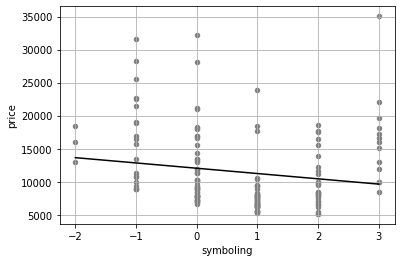

 
33.43 x + 7396 - fit line
-5225.175826431001 - R2


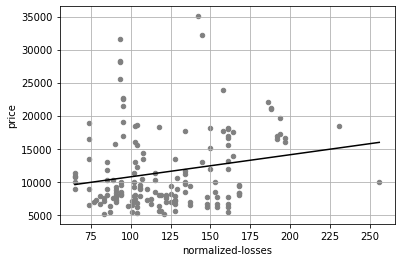

 
835.4 x - 7.064e+04 - fit line
-3313657.690914598 - R2


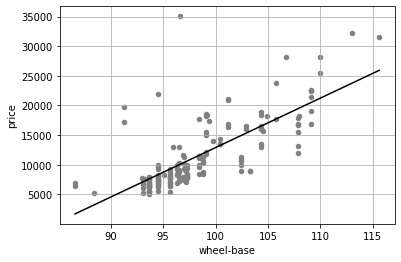

 
388.2 x - 5.548e+04 - fit line
-707603.9382546935 - R2


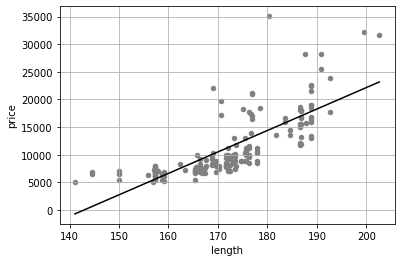

 
2545 x - 1.555e+05 - fit line
-30902762.137249183 - R2


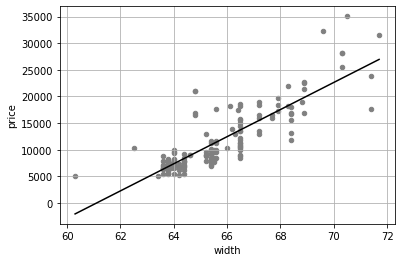

 
634.3 x - 2.274e+04 - fit line
-1921989.24694409 - R2


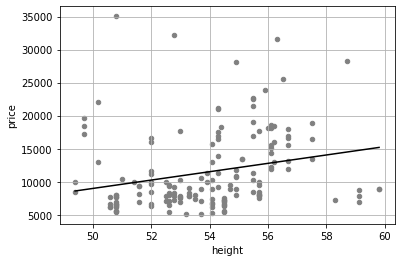

 
10.9 x - 1.538e+04 - fit line
-376.2914314221931 - R2


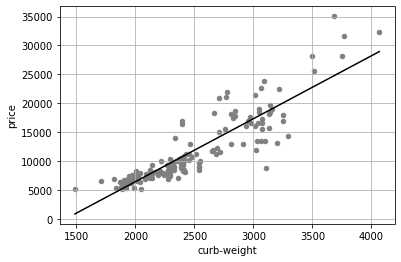

 
1.174e+04 x - 2.729e+04 - fit line
-663262966.913653 - R2


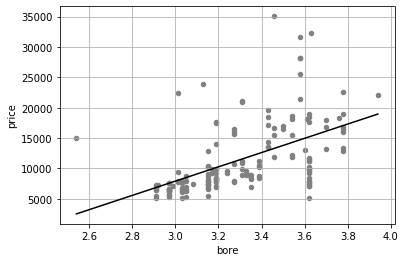

 
3202 x + 1081 - fit line
-49360983.01493417 - R2


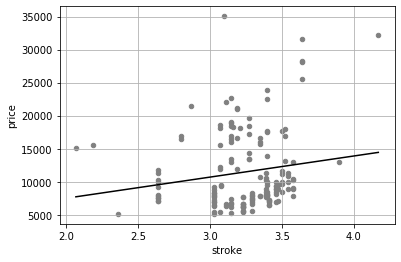

 
316.4 x + 8231 - fit line
-480771.1154768757 - R2


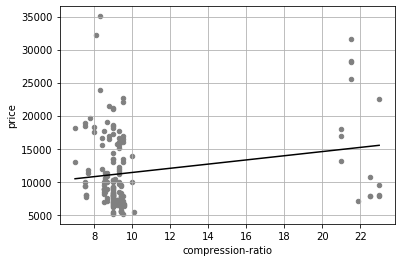

 
145.4 x - 2489 - fit line
-100173.82104401468 - R2


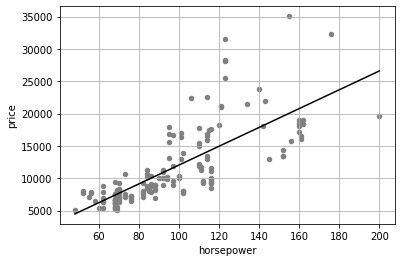

 
-2.17 x + 2.254e+04 - fit line
-14.543307462723433 - R2


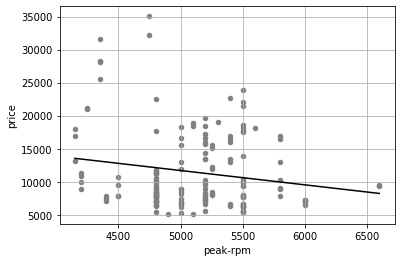

 
-667.4 x + 2.915e+04 - fit line
-2138388.5906386203 - R2


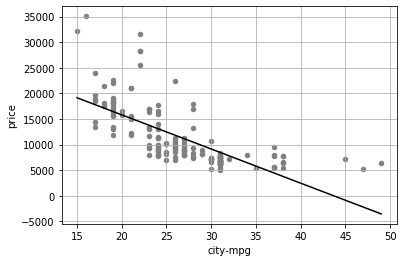

 
-655.3 x + 3.247e+04 - fit line
-2060025.3151171037 - R2


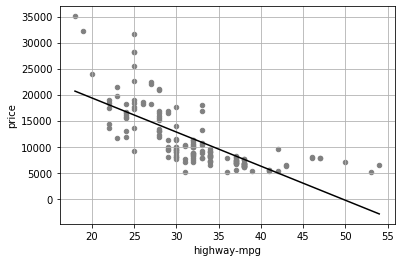

 
1 x + 1.516e-13 - fit line
1.0 - R2


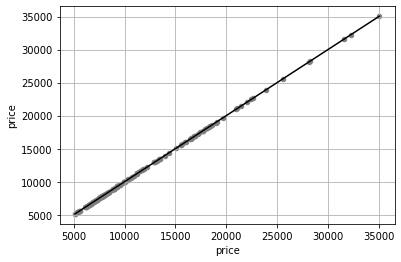

 
5629 x - 1.241e+04 - fit line
-152482337.40629476 - R2


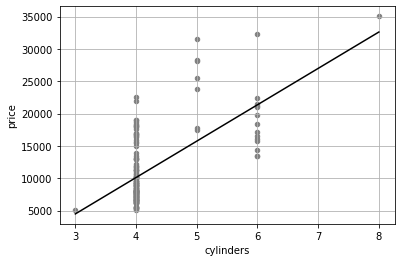

 
968.7 x + 8351 - fit line
-4515076.275422386 - R2


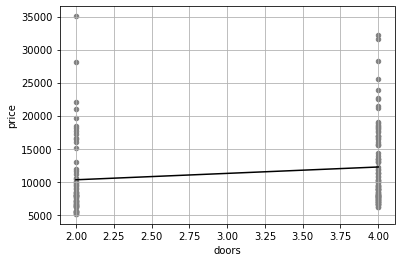

In [6]:
def plot_scatter_with_fitline(dataset, xaxis, yaxis):
    dataset = dataset.sort_values(xaxis)

    z = np.polyfit(dataset[xaxis], dataset[yaxis], 1)
    f = np.poly1d(z)
    print(f"{f} - fit line\n{r2_score(dataset[yaxis], f(dataset[yaxis]))} - R2")

    plt.scatter(x=dataset[xaxis], y=dataset[yaxis], marker='o', s=20, color='grey')
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.plot(dataset[xaxis], f(dataset[xaxis]), color='black')
    plt.grid()
    plt.show()

columns = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'cylinders', 'doors']
    
for column in columns:
    plot_scatter_with_fitline(df, column, 'price')
